### Elevation change drived by altimeter 


In [4]:
from utils.geotif_io import readTiff
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import xarray as xr


In [5]:
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'
path_dem = 'data/dem-data/srtm-c/SRTMGL3_900m.tif'
path_result_isat1 = 'data/icesat-1/result_isat1.nc'
path_result_isat2 = 'data/icesat-2/result_isat2.nc'
path_result_cryo2 = 'data/cryosat-2/result_cryo2.nc'
path_result_dems = 'data/aster-stereo/result_dems_sub.nc'


In [6]:
dem, dem_info = readTiff(path_dem)
result_isat1_xr = xr.open_dataset(path_result_isat1)
result_isat2_xr = xr.open_dataset(path_result_isat2)
result_cryo2_xr = xr.open_dataset(path_result_cryo2)
result_dems_xr = xr.open_dataset(path_result_dems)
result_isat1_xr
result_cryo2_xr
result_dems_xr



<xarray.Dataset>
Dimensions:                      (tiles_id: 112, bins_id: 50, years: 23)
Coordinates:
  * tiles_id                     (tiles_id) object 'tile_270_960' ... 'tile_3...
  * bins_id                      (bins_id) object '2500-2600' ... '7400-7500'
  * years                        (years) object '2000' '2001' ... '2021' '2022'
Data variables: (12/13)
    tiles_lat                    (tiles_id) int64 ...
    tiles_lon                    (tiles_id) int64 ...
    area_glacier_bins            (bins_id) float64 ...
    area_glacier_tiles           (tiles_id) float64 ...
    ele_change_setp_cor          (years) float64 ...
    ele_change_setp_cor_error    (years) float64 ...
    ...                           ...
    rate_setp                    float64 ...
    rate_setp_error              float64 ...
    rate_tiles                   (tiles_id) float64 ...
    rate_tiles_error             (tiles_id) float64 ...
    rate_bins                    (bins_id) float64 ...
    rate_bins_error              (bins_id) float64 ...

#### Elevation change on setp glacier by multiple altimeters data.

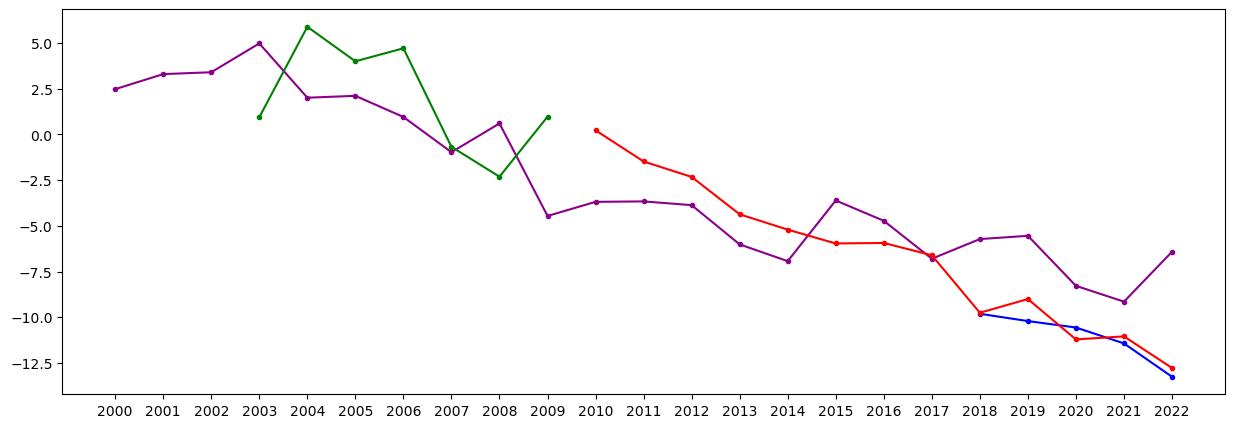

In [12]:
plt.figure(figsize=(15,5))
residual_fit_dems = abs(result_dems_xr['ele_change_setp_cor'].values - result_dems_xr['ele_change_setp_cor_fitting'].values)
residual_fit_isat1 = abs(result_isat1_xr['ele_change_setp_cor'].values - result_isat1_xr['ele_change_setp_cor_fitting'].values)
residual_fit_isat2 = abs(result_isat2_xr['ele_change_setp_cor'].values - result_isat2_xr['ele_change_setp_cor_fitting'].values)
residual_fit_cryo2 = abs(result_cryo2_xr['ele_change_setp_cor'].values - result_cryo2_xr['ele_change_setp_cor_fitting'].values)

#### dems
plt.plot(result_dems_xr.years, result_dems_xr['ele_change_setp_cor'], '.-', color='DarkMagenta', label='elevation change by dems')   ### bin-based area weighting -> tile-based area weighting
# plt.plot(result_dems_xr.years, result_dems_xr['ele_change_setp_cor_fitting'], '-r', label='bins weighting and then tiles weighting')   ### bin-based area weighting -> tile-based area weighting
# plt.fill_between(result_dems_xr.years, result_dems_xr['ele_change_setp_cor'] - residual_fit_dems, \
#                  result_dems_xr['ele_change_setp_cor'] + residual_fit_dems, color='DarkMagenta', alpha=0.3)


#### icesat-1
plt.plot(result_isat1_xr.years, result_isat1_xr['ele_change_setp_cor'], '.-g', label='elevation change by icesat-1')   ### bin-based area weighting -> tile-based area weighting
# plt.plot(result_isat1_xr.years, result_isat1_xr['ele_change_setp_cor_fitting'], '-r', label='bins weighting and then tiles weighting')   ### bin-based area weighting -> tile-based area weighting
# plt.fill_between(result_isat1_xr.years, result_isat1_xr['ele_change_setp_cor'] - residual_fit_isat1, \
#                  result_isat1_xr['ele_change_setp_cor'] + residual_fit_isat1, color='green', alpha=0.3)

#### icesat-2
plt.plot(result_isat2_xr.years, result_isat2_xr['ele_change_setp_cor'], '.-b', label='elevation change by icesat-2')   ### bin-based area weighting -> tile-based area weighting
# plt.plot(result_isat2_xr.years, result_isat2_xr['ele_change_setp_cor_fitting'], '-r', label='bins weighting and then tiles weighting')   ### bin-based area weighting -> tile-based area weighting
# plt.fill_between(result_isat2_xr.years, result_isat2_xr['ele_change_setp_cor'] - residual_fit_isat2, \
#                  result_isat2_xr['ele_change_setp_cor'] + residual_fit_isat2, color='b', alpha=0.3)


#### cryosat-2
plt.plot(result_cryo2_xr.years, result_cryo2_xr['ele_change_setp_cor'], '.-r', label='elevation change by cryosat-2')   ### bin-based area weighting -> tile-based area weighting
# plt.plot(result_cryo2_xr.years, result_cryo2_xr['ele_change_setp_cor_fitting'], '-r', label='bins weighting and then tiles weighting')   ### bin-based area weighting -> tile-based area weighting
# plt.fill_between(result_cryo2_xr.years, result_cryo2_xr['ele_change_setp_cor'] - residual_fit_cryo2, \
#                  result_cryo2_xr['ele_change_setp_cor'] + residual_fit_cryo2, color='red', alpha=0.3)



#### Elevation rates drived by different data

In [13]:
print('Elevation change rate by aster dems: %f + %f' % (result_dems_xr['rate_setp'], result_dems_xr['rate_setp_error']))
print('Elevation change rate by icesat-1: %f + %f' % (result_isat1_xr['rate_setp'], result_isat1_xr['rate_setp_error']))
print('Elevation change rate by icesat-2: %f + %f' % (result_isat2_xr['rate_setp'], result_isat2_xr['rate_setp_error']))
print('Elevation change rate by cryosat-2: %f + %f' % (result_cryo2_xr['rate_setp'], result_cryo2_xr['rate_setp_error']))




Elevation change rate by aster dems: -0.575356 + 0.145972
Elevation change rate by icesat-1: -2.108709 + 0.513265
Elevation change rate by icesat-2: -0.521687 + 0.118430
Elevation change rate by cryosat-2: -1.044897 + 0.048821


### Tile-based elevation change mapping

### icesat-2 derived scatterplot.


['$\\mathdefault{200}$', '$\\mathdefault{400}$', '$\\mathdefault{600}$']


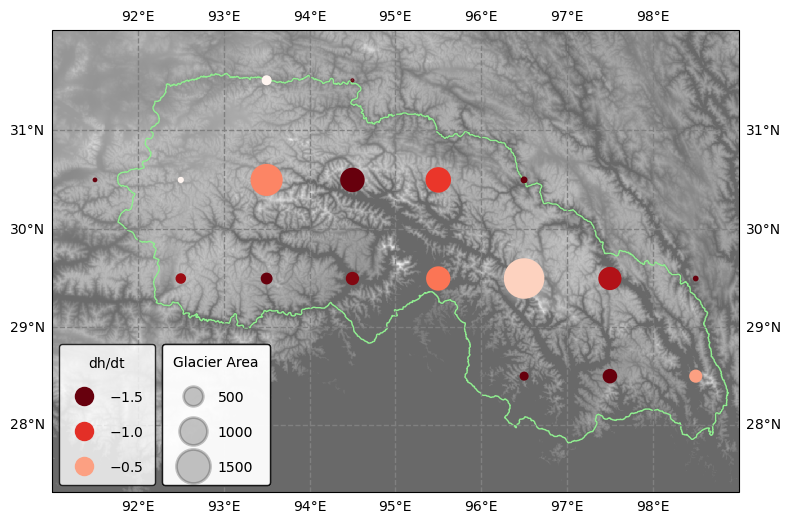

In [8]:
# Scatterplot
cmap_dem = LinearSegmentedColormap.from_list('linear color', ["DimGray", "white"])
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))
ax.set_extent([91, 99, 27.3, 32])
ax_dem = ax.imshow(dem, extent=dem_info['geoextent'], 
                                vmin=3500, vmax=7000, cmap=cmap_dem, \
                                transform=ccrs.PlateCarree(), zorder=0)   ## cmap:PRGn

## 1. Tibeteau southeast boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='lightgreen', linewidth=1, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

cmap_dhdt=plt.cm.get_cmap('Reds').reversed()

scatter = ax.scatter(
    x = result_isat2_xr['tiles_lon'].values+0.5, 
    y = result_isat2_xr['tiles_lat'].values+0.5, 
    s = result_isat2_xr['area_glacier_tiles'].values/2.5,
    c = result_isat2_xr['rate_tiles'].values,
    cmap=cmap_dhdt,
    alpha=1, 
    linewidth=2,
    vmax=0,
    vmin=-1.5,
    transform=ccrs.PlateCarree(),
    )

ax.gridlines(draw_labels=True, linewidth=1, alpha=1, zorder=1, color='grey', linestyle='--')

# produce a legend with the unique colors from the scatter
handles, labels = scatter.legend_elements(prop="colors", num=[-1.5, -1, -0.5])
legend1 = ax.legend(handles, labels, loc="lower left", title="dh/dt",\
                            facecolor='white', edgecolor='black', borderpad=0.8, labelspacing=1.5, markerscale=2)

# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", num=[500/2.5, 1000/2.5, 1500/2.5], alpha=0.2)
print(labels)
legend2 = ax.legend(handles, [500, 1000, 1500], loc="lower left", title="Glacier Area", \
                                                edgecolor='black', borderpad = 0.8, labelspacing=1.5, bbox_to_anchor=(0.15, 0.))

ax.add_artist(legend1)
ax.add_artist(legend2)



### dems derived scatterplot.

['$\\mathdefault{200}$', '$\\mathdefault{400}$']


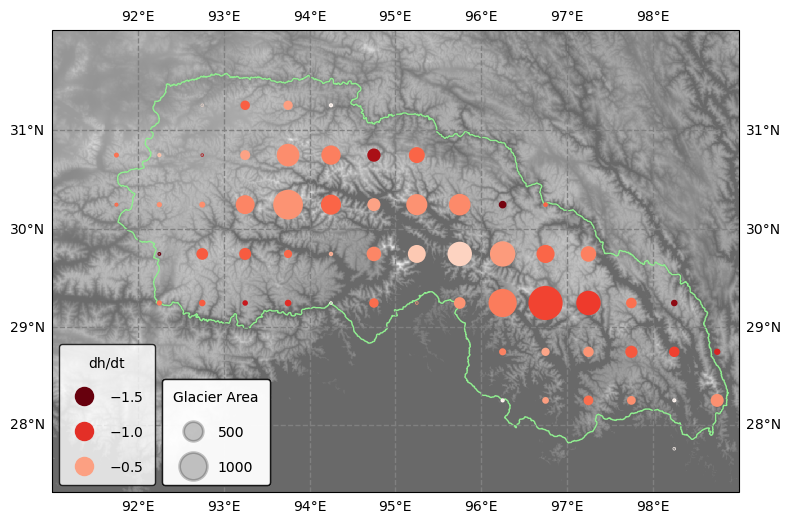

In [14]:
# Scatterplot
cmap_dem = LinearSegmentedColormap.from_list('linear color', ["DimGray", "white"])
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))
ax.set_extent([91, 99, 27.3, 32])
ax_dem = ax.imshow(dem, extent=dem_info['geoextent'], 
                                vmin=3500, vmax=7000, cmap=cmap_dem, \
                                transform=ccrs.PlateCarree(), zorder=0)   ## cmap:PRGn

## 1. Tibeteau southeast boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='lightgreen', linewidth=1, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

cmap_dhdt=plt.cm.get_cmap('Reds').reversed()

scatter = ax.scatter(
    x = result_dems_xr['tiles_lon'].values/10+0.25, 
    y = result_dems_xr['tiles_lat'].values/10+0.25, 
    s = result_dems_xr['area_glacier_tiles'].values/1.5,
    c = result_dems_xr['rate_tiles'].values,
    cmap=cmap_dhdt,
    alpha=1, 
    linewidth=2,
    vmax=0,
    vmin=-1.5,
    transform=ccrs.PlateCarree(),
    )

ax.gridlines(draw_labels=True, linewidth=1, alpha=1, zorder=1, color='grey', linestyle='--')

# produce a legend with the unique colors from the scatter
handles, labels = scatter.legend_elements(prop="colors", num=[-1.5, -1, -0.5])
legend1 = ax.legend(handles, labels, loc="lower left", title="dh/dt",\
                            facecolor='white', edgecolor='black', borderpad=0.8, labelspacing=1.5, markerscale=2)

# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", num=[500/2.5, 1000/2.5, 1500/2.5], alpha=0.2)
print(labels)
legend2 = ax.legend(handles, [500, 1000, 1500], loc="lower left", title="Glacier Area", \
                                                edgecolor='black', borderpad = 0.8, labelspacing=1.5, bbox_to_anchor=(0.15, 0.))

ax.add_artist(legend1)
ax.add_artist(legend2)



### Bin-based elevation change mapping


Text(0.5, 1.0, 'selected tile')

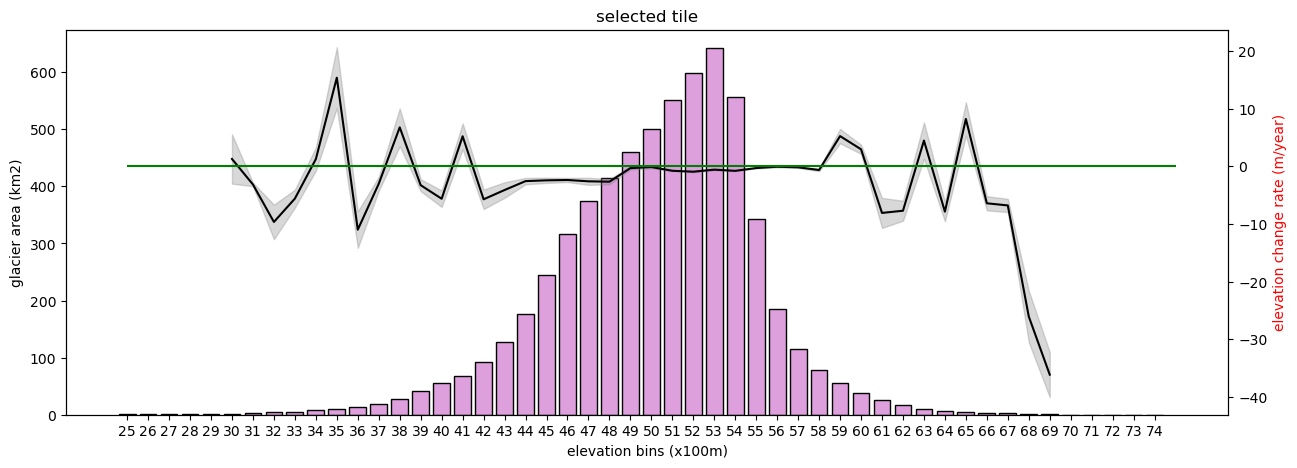

In [13]:
bins_id = result_isat2_xr['bins_id'].values
bins_id_start = [bin_id[0:2] for bin_id in bins_id]
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111) # Create matplotlib axes
ax1.bar(bins_id_start, result_isat2_xr['area_glacier_bins'], color ='Plum', edgecolor ='black')
ax1.set_ylabel('glacier area (km2)')
ax1.set_xlabel('elevation bins (x100m)')
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax.
ax2.set_ylabel('elevation change rate (m/year)', color='red')
ax2.plot(bins_id_start, result_isat2_xr['rate_bins'], 'black')
plt.fill_between(bins_id_start, result_isat2_xr['rate_bins'] - result_isat2_xr['rate_bins_error'], \
                 result_isat2_xr['rate_bins'] + result_isat2_xr['rate_bins_error'],
                 color='gray', alpha=0.3)

ax2.hlines(y=0, xmin=0, xmax=50, colors='green')
# plt.xticks([1, 25, 50], [2500, 5000, 7500])
plt.xlabel('elevation (m)')
plt.title('selected tile')

